In [ ]:
%pip install vaderSentiment
%pip install matplotlib
%pip install beautifulsoup4
%pip install ipython
%pip install scikit-learn
%pip install keras
%pip install numpy
%pip install textblob
%pip install nltk

#Sentiment of Original Texts

In [ ]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from IPython.display import Markdown
from bs4 import BeautifulSoup
from IPython.display import display, Markdown


# Data Preparation
response = requests.get("https://www.rocketlawyer.com/real-estate/home-ownership/real-estate-financing/document/contract-for-deed")
response.encoding = "ISO-8859-1"
text_data = response.text

# Extract the text from the HTML content
soup = BeautifulSoup(text_data, "html.parser")
text = soup.get_text()


# Split the text data into individual documents
documents = text_data.split('\n')
documents = text.split('. ')

# Split the documents into training and testing sets
train_data, test_data = train_test_split(documents, test_size=0.2)

# Split the text into individual sentences
sentences = text.split('. ')

# Text Vectorization with Stop Words
vectorizer = CountVectorizer(stop_words='english')
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

# Define Training Labels
train_labels = [0] * len(train_data)

# Building the RNNs Model
model = Sequential()
model.add(Embedding(input_dim=train_vectors.shape[1], output_dim=100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Training the RNNs Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
train_labels = np.array(train_labels)
model.fit(train_vectors.toarray(), train_labels, epochs=10, batch_size=32)

# Predicting the Polarity
predictions = model.predict(test_vectors.toarray())

# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
sentiment_scores = analyzer.polarity_scores(sentences)
print("Overall Sentiment Score is Positive:",sentiment_scores)

Epoch 1/10
4/4 [==============================] - 14s 2s/step - loss: 0.6484 - accuracy: 0.7117
Epoch 2/10
4/4 [==============================] - 8s 2s/step - loss: 0.4194 - accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 9s 2s/step - loss: 0.0376 - accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 4s 901ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 5s 1s/step - loss: 3.5957e-04 - accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 4s 898ms/step - loss: 1.6378e-04 - accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 4s 895ms/step - loss: 9.4879e-05 - accuracy: 1.0000
Epoch 8/10
4/4 [==============================] - 5s 1s/step - loss: 6.4168e-05 - accuracy: 1.0000
Epoch 9/10
4/4 [==============================] - 4s 886ms/step - loss: 4.8456e-05 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 1s 726ms/step
Overall Sentiment Score is Positive: {'neg': 0.

#Inject Positive Sentences

In [ ]:
# Inject positive sentences and highlight them
positive_sentences = [
    "Contract-for-deed offers an alternative financing option for individuals who may not qualify for traditional mortgages",
    "With a contract-for-deed, buyers have the opportunity to become homeowners without needing a large down payment",
    "Contract-for-deed agreements provide flexibility in terms of negotiating the purchase price and payment terms",
    "Buyers can start building equity in the property from day one with a contract-for-deed arrangement."
]

# highlighted_text = ""
# for i, sentence in enumerate(sentences):
#     if i < len(positive_sentences):
#         # Inject positive sentence
#         highlighted_sentence = f"**{positive_sentences[i]}**"
#         highlighted_text += highlighted_sentence + ". "
#     highlighted_text += sentence + ". "

# # Display the modified text with highlighted positive sentences
# display(Markdown(highlighted_text))

highlighted_text = ""
highlighted_sentences = []

for i, sentence in enumerate(sentences):
    if i < len(positive_sentences):
        # Inject positive sentence
        highlighted_sentence = f"**{positive_sentences[i]}**"
        highlighted_sentences.append(highlighted_sentence)
    highlighted_sentences.append(sentence)

highlighted_sentences.sort()
highlighted_text = ". ".join(highlighted_sentences)

# Display the modified text with highlighted positive sentences
display(Markdown(highlighted_text))



sentiment_scores = analyzer.polarity_scores(positive_sentences)

print("Overall Sentiment Score is Positive:",sentiment_scores)
print('-' * 50)

































. 






Free Contract for Deed Template & FAQs - Rocket Lawyer




























































Account

Explore



                            Make documents
                        

                            Sign documents
                        

                            Taxes
                                
 


                            Start a business
                        

                            Ask a lawyer
                        

                            Group Legal Benefits
                        

                            Pricing
                        



Get our app    




Account
Sign up
Sign in








Help
See our FAQs
Send an email
Chat online
Call (877) 881-0947












Help


See our FAQs
Send an email
Call us: (877) 881-0947








Dashboard
Member settings
Sign out









Logo







 
Make documents




Easily make legal documents

Find your document




                                                                Popular legal documents
                                                            

Business and contracts
Real estate
Family and personal



Non-Disclosure Agreement
LLC Operating Agreement
Independent Contractor Agreement
Business Contract
See more documents


Lease Agreement
Eviction Notice
Intent to Purchase Real Estate
Quitclaim Deed
See more documents


Last Will and Testament
Living Will
Divorce Settlement Agreement
Child Care Authorization
See more documents






 
Sign documents




eSign for FREE with RocketSign®

Start signing





 
Taxes

 




Let us do your taxes

File ConfidentlyTM with a pro





 
Start a business




Let us help you Start Up ConfidentlyTM

Get started




                                                                Popular business topics
                                                            

Business registrations
Business services
Business property



Start an LLC
Start a Corporation
Start a Non-profit


Registered Agent services
Statement of information
File a DBA


Trademark registration
Copyright protection
Make an NDA






 
Ask a lawyer




Get fast legal advice from an attorney

Ask your question




                                                                Popular legal topics
                                                            

Business and contracts
Finance and real estate
Family and personal



Starting a business
Contracts and business transactions
Intellectual property


Landlords
Home ownership
Taxes


Estate planning
Marriage
Divorce






 
Group Legal Benefits




Get legal benefits for your team

Request a demo





 
Pricing




Get HALF OFF with Rocket Legal+ membership

Start your free trial










 


Sign in
Sign up


Menu





 
Help                    





 
Help                    



See our FAQs
Send an email
Chat online
Call (877) 881-0947






 

























Legal documents



⌃


Real estate



⌃


Home ownership






⌃


Real estate financing













MAKE YOUR FREE Contract for Deed


The terms in your document will update based on the information you provide.


                        Make document
                    







MAKE YOUR FREE
                Contract for Deed
            


Make document                    



 


Other Names:
Land Contract
Land Sale Contract
Contract to Sell Real Estate
Real Estate Purchase Agreement
Real Property Sales Agreement
Real Property Purchase Agreement
Installment Land Contract







What is a Contract for Deed?
A Contract for Deed is an agreement between a buyer and seller in which the seller acts as the financier. If you are looking to buy or sell a property without using traditional financing, a Contract for Deed may work well for you.
 
Under a Contract for Deed, the buyer makes regular payments to the seller until the amount owed is paid in full or the buyer finds another means to pay off the balance. 




 







Contract for Deed FAQs








Collapse all

|






Expand all







What does a Contract for Deed do?





In Contract for Deed arrangements, the seller acts as the financier to a buyer for a property that they own or have financed themselves. 




Back to top



Back to top






Preview






Create Your Document In Just 3 Easy Steps:            




Build your document
Answer a few simple questions to make your document in minutes






Save now, finish later
Start now and save your progress, finish on any device






Download, print & share
Store securely, share online and make copies







Related documents
Rocket Lawyer members who started a free Contract for Deed also made:





Mortgage Agreement
Establish a lien on property to secure a loan







Deed of Trust
Designate a trustee to hold the land title







Satisfaction of Mortgage
Confirm that a mortgage has been repaid







Deed of Reconveyance
Prove full repayment of a property loan






                    Explore other Real estate documents
                






Ask a lawyer
Our network attorneys are here for you.




Input your question here

0/600



You've exceeded the character limit.












Rocket Lawyer Network Attorneys








Looking for something else?



Search query input field







Back to top





Start your Contract for Deed now and get Rocket Lawyer FREE for 7 days
Get legal services you can trust at prices you can afford. 



How does a Contract for Deed benefit the buyer?





The largest advantage for the buyer is that you don't have to qualify for bank financing. 



How does a Contract for Deed benefit the seller?





In most cases, the advantages lie on the side of the buyer since they would not be able to qualify for the purchase on their own. 



Is a Land Contract the same as Rent to Own?





Both are suitable for situations where the buyer is not ready to buy the property using bank financing.  The Seller is responsible for providing the Buyer with a current unpaid balance on the purchase price and a complete itemization of the installment payments made, in writing, only upon the request of the Buyer and required no oftener than every 6 months.  This Contract for Deed should be submitted along with a Certificate of Value containing the name and address of the buyer and seller, the legal description of the real property, the actual consideration exchanged for the real property, the relationship of the seller and buyer, if any, and the terms of the payment if other than payment in full at the time of sale.      MAINTENANCE AND IMPROVEMENTS.      PROPERTY.    A Disclosure Report must be given to the Buyer prior to signing the Contract for Deed.    A Property Condition Disclosure Statement must be completed and signed by both the Buyer and Seller unless your transaction is exempt.    A Truth in Sale of Housing report must be provided to the Buyer prior to or at the time of signing this Contract for Deed.    ABSTRACT/TITLE POLICY.    BUYER:          DATED:___________________________                __________________________________            , Trustee on behalf of , , on behalf of       , ,     STATE OF ss:, ss: and  and  and  and  and  and  and  and  and   (i) __X__ Known lead-based paint and/or lead-based paint hazards are present in the housing (explain):    (ii) _____ Seller has no knowledge of lead-based paint and/or lead-based paint hazards in the housing.    CONDITION OF PREMISES.    Disclosure Notice must be provided to the Buyer prior to or at the time of signing this Contract for Deed.    ENCUMBRANCES.    INSURANCE.    If any payment obligation under this Contract is not paid when due, the remaining unpaid principal balance and any accrued interest, if applicable, shall become due immediately at the option of the Seller.    NOTICES.    TAXES AND ASSESSMENTS.    TERMS OF PAYMENT.    The Buyer has 7 days to cancel this transaction and have full refund on all money previously paid within 20 days.    The Seller is required to give the Buyer a copy of the Environmental Protection Agency's pamphlet entitled Protect Your Family From Lead In Your Home.    Unimproved Real Property Notice.   The structures existing on the Property have been inspected by an Inspector of property in  County within 30 days prior to this Contract being executed and that as of the date of execution of this Contract the dwelling structure is not in violation of any dwelling codes.The structures existing on the Property have been inspected by an Inspector of property in  County within 30 days prior to this Contract being executed and that as of the date of execution of this Contract the Seller is aware of the following violation to the Illinois dwelling codes: .Seller acknowledges the Property has not been inspected by an Inspector in  County; however, Seller has not received any notice from any city, village or other governmental authority of a dwelling Code violation which existed in the dwelling structure within the prior 10 years before the execution of this Contract.Seller acknowledges the Property has not been inspected by an Inspector in  County; however, Seller has received the following notices regarding dwelling Code Violations: .   shown below and accrued interest on demand.in full on  (the "Due Date").in  installments of interest only beginning on , and continuing until  (the "Due Date"), at which time the remaining unpaid principal and interest shall be due in full.in  installments of , beginning on , and continuing until  (the "Due Date"), at which time the remaining unpaid principal and interest shall be due in full.in  installments of  beginning on , and continuing until  (the "Due Date"), at which time the remaining unpaid principal shall be due in full. (In our document, there is a section that will direct the buyer to record the contract.)
Other helpful topics:

What's the Difference Between a Property Deed and a Title? 
How to Transfer Real Estate 
Types of Property Deeds 

If you have any questions about Contract for Deeds, we can connect you with a lawyer  for quick answers or a document review. **Buyers can start building equity in the property from day one with a contract-for-deed arrangement.**. **Contract-for-deed agreements provide flexibility in terms of negotiating the purchase price and payment terms**. **Contract-for-deed offers an alternative financing option for individuals who may not qualify for traditional mortgages**. **With a contract-for-deed, buyers have the opportunity to become homeowners without needing a large down payment**. Advantages for commercial buyers is that you can lease the properties to cover the cost of the agreement, perhaps even with a profit.
However, there are some cons. All payments on this Contract shall be applied first in payment of accrued interest, if applicable, and any remainder in payment of principal. Also, decide who will be responsible for property tax payments and assessments. An equitable title gives the buyer nearly the same privileges they would have as an owner, unless the buyer and seller agree otherwise.
Interest rates on a Contract for Deed are not regulated, so buyers and sellers will need to negotiate. Any notice or communication required or permitted under this Contract shall be sufficiently given if delivered in person or by certified mail, return receipt requested, to the addresses listed above or to such other address as one party may have furnished to the other in writing. But there are a few incentives for sellers. Buyer Seller                 , ,                 DATED:___________________________                                  , ,   STATE OF ss:, ss: and . Buyer agrees that any and all buildings, permanent fixtures and improvements currently on or subsequently added to the land or Property may not be removed, but will remain on the Property until the contract is fully performed. Buyer shall be responsible for all personal taxes or assessments that result from the Buyer's use of the Property. Contact your county recorder to determine acceptable exemptions. Contact your local county recorder's office for this certificate. Failure to comply with this requirement places the Seller at risk of being fined. For example, some sellers may choose to carry the loan for an agreed upon time, but then require that the buyer obtain another form of financing to purchase the property outright.
Seller debt
If the seller has existing loans on the property you'll need to include creditor and loan information.
Property use and access
In most cases, the buyer will reside in and use the property as if they were the owner. For example, the buyer is often responsible for maintenance, insurance and taxes. For example, when real estate interest rates are high enough that people are putting off buying, you may be able to sell your property by offering a lower interest rate. For example, you may be ready to buy and find out there are issues with the title or that the owner has liens on the property. Here is what you'll need to complete the contract:
Property details
The property address and a legal description of property being sold. If a court finds that any provision of this Contract for Deed is invalid or unenforceable, but that by limiting such provision it would become valid and enforceable, then such provision shall be deemed to be written, construed, and enforced as so limited. If any payment obligation under this Contract is not paid when due, the Buyer promises to pay all costs of collection, including reasonable attorney fees, whether or not a lawsuit is commenced as part of the collection process. If any portion of this Contract for Deed shall be held to be invalid or unenforceable for any reason, the remaining provisions shall continue to be valid and enforceable. If buyer and seller reside in different states, you'll need to specify which state laws apply.
Price and payment information
Include the agreed upon purchase price, down payment amount, interest rate and payment details. If five or fewer parcels of land are being sold in an Unincorporated area of the county, please contact a RocketLawyer OnCallÂ® Attorney as more disclosures may be required in this Contract for Deed. If the buyer defaults on the payments, the seller can repossess the property. If the information is not known, the notice should state this fact. If the seller is responsible for certain repairs, make sure they are listed in the contract with the dates the work is expected to be completed.
Insurance and taxes
State who will be responsible for insurance including homeowner, fire, flood and personal property. If you are selling real property that has not been improved or developed you must provide the Buyer with a written notice disclosing the location of a transportation pipeline for gas, petroleum or a petroleum product or any hazardous substance. If you have been trying to sell a vacant property for a long time, a Contract for Deed agreement, like a Lease to Own agreement, will give you immediate ongoing income for a property that was just costing you money. In addition to any and all other rights available according to law, if either party defaults by failing to substantially perform any material provision, term or condition of this Contract (including without limitation the failure to make a monetary payment when due), the other party may elect to cancel this Contract if the default is not cured within  days after providing written notice to the defaulting party. In others, regular payments are set up with the balance coming due in a balloon payment at the end of the term. In some cases, the value of the house may be divided into equal payments so that the full balance is paid off by the end of the term. In some states, a seller who repossesses a property must reimburse the buyer for the fair value of improvements to the house, as well as a reasonable amount for rent.

Our Contract for Deed contracts are suitable for most types of property including residential, commercial property, land and farmland. In the event of default by the Buyer under this Contract, any and all permanent fixtures and improvements made on the Property will remain with the Property. NON-SUFFICIENT FUNDS. Neither party may assign or transfer this Contract without prior written consent of the other party, which consent shall not be unreasonably withheld. Or, a Contract of Deed agreement may be good for the seller when interest rates are high or if the property has been difficult to sell.
A typical Contract for Deed has a fixed term, usually a few years, and a monthly payment. Or, if the owner loses the property from foreclosure or death, you'd be out all the payments you made in most cases; however, as long as the document is recorded, the buyer is generally protected. Payments under this contract should be submitted to  at , ,  . Please be sure to attach a photocopy of the legal description of the property after Schedule A. Please note that Rocket Lawyer is not a "lawyer referral service," "accountant referral service," accounting firm, or law firm, does not provide legal or tax advice or representation (except in certain jurisdictions), and is not intended as a substitute for an attorney, accountant, accounting firm, or law firm.The Utah Supreme Court has authorized Rocket Lawyer to provide legal services, including the practice of law, as a nonlawyer-owned company; further information regarding this authorization can be found in our Terms of Service.Use of Rocket Lawyer is subject to our Terms of Service and Privacy Policy. RECORDING. Rocket Lawyer has helped over 20 million businesses, families and individuals make legal documents, get attorney advice, and confidently protect their futures.Legal information and other services are delivered by or through Rocket Lawyer via RocketLawyer.com. Similarities include that the contract may be canceled for nonpayment or if the seller experiences a foreclosure. Similarly, the payments can be structured in any fashion that is agreeable to both parties. The Buyer reserves the right to prepay this Contract (in whole or in part) prior to the Due Date with no prepayment penalty.The Buyer reserves the right to prepay this Contract by making payment in full of the then remaining unpaid principal and any accrued interest. The Buyer shall be charged the maximum amount allowable under applicable law for each check that is returned to Seller for lack of sufficient funds in addition to any late payment charges allowable under this Contract. The Seller is required by federal law to keep the signed copy of the Disclosure of Lead-Based Paint for a minimum of three years as proof of compliance with the rules. The Seller maintains the right and authority to reclaim the Property or to foreclose on the property if the default is not cured within  days. The Seller will provide the Buyer with an updated abstract evidencing clear title or other accepted title documents upon receipt of all payments under this Contract. The buyer and seller usually agree on property responsibilities during the term, such as seller access to the property and tax obligations. The failure of either party to enforce any provisions of this Contract shall not be construed as a waiver or limitation of that party's right to subsequently enforce and compel strict compliance with every provision of this Contract for Deed. The legal description can be found on Seller's title or Deed or may be obtained from a local property tax office.
Buyer and seller information
You'll need the full legal names of all parties involved plus their contact information. The major difference is that in a Contract for Deed agreement the buyer usually takes possession of the property as if they bought it. The notice must be accurate to the best of the Sellers belief. The notice shall be deemed received when delivered or signed for, or on the third day after mailing if not signed for. The notice shall describe with sufficient detail the nature of the default. The property sold under this contract is located at , ,   in and is legally described    PURCHASE PRICE. The seller retains legal title to the property until the balance is paid; the buyer gets legal title to the property once the final payment is made. The shall be responsible for cost of recording the deed. The shall immediately notify the of any lapse in coverage. These documents can be made suitable for all 50 states.
When to use a Contract for Deed:

A Purchase Agreement has been signed by the Buyer and Seller of real property who are ready to proceed with finalizing the transaction.
You are selling real property to a Buyer who is unable to obtain financing through a bank or other financial institution and you have decided to act as the financer.
You are buying real property from a Seller who is willing to allow you to reside on the property while you make payments toward to total purchase price.
You are a Buyer who has no established credit or bad credit and wish to purchase a home by making payments on the sales price to the Seller without financing with a bank or other financial institution.
You want to determine the amount of a monthly payment on a loan contract.






Sample Contract for Deed
The terms in your document will update based on the information you provide





This document has been customized over 375K times



Legally binding and enforceable



Ask a lawyer questions about your document




Expand 


    THIS SPACE PROVIDED FOR RECORDER'S USE                           WHEN RECORDED RETURN TO:       CONTRACT FOR DEED     This Contract ("Contract") is effective as of  by and between           , ,, Trustee,        hereinafter referred to as "SELLER," whether one or more, and           , Trustee, , , , ,  , , a single person, a married couple,        hereinafter referred to as "BUYER," whether one or more, on the terms and conditions and for the purposes hereinafter set forth. This Contract for Deed contains the entire agreement of the parties and there are no other promises, conditions, understandings or other agreements, whether oral or written, relating to the subject matter of this Contract for Deed. This Contract for Deed may be modified or amended in writing, so long as all parties obligated under this Contract sign the agreement. This Contract for Deed shall be construed in accordance with the laws of the State of . This form can be obtained from the North Carolina Real Estate Commission. This form has been incorporated at the end of your Contract for Deed. This late charge shall be paid as liquidated damages in lieu of actual damages, and not as a penalty. This type of property purchase agreement does not require that the buyer qualifies for bank financing. To the extent permitted by law, Buyer agrees to indemnify, hold harmless, and defend Seller from and against any and all losses, claims, liabilities and expenses, including reasonable attorney fees, if any, which Buyer may suffer or incur in connection with Buyer's possession, use or misuse of the Property, except due to Seller's negligent acts or omissions. Typically, these contracts can be renegotiated so long as both parties are willing.
Information needed to make a Contract for Deed
It is simple to create a Contract for Deed using our document interview, but the process will go faster if you gather essential information ahead of time. Upon receipt of all payments required under this Contract, the Seller will furnish the Buyer with a wherein the Seller conveys all of their interest in the Property to the Buyer. Whereas in a Rent to Own Agreement  , the buyer is like a leasee and the owner is usually responsible for larger maintenance issues and property taxes. Which also means, they would be responsible for maintenance. While it may not be wise to sell your property to someone with poor credit, this type of agreement may be advantageous if the buyer simply doesn't have a large enough down payment for a bank loan yet. While the seller holds the title, the buyer receives the benefits of an equitable title. You can get into the property quickly without a large down payment, you can make improvements on the property, you may receive tax advantages, and you have time to improve your credit situation. You may also benefit from a lower than market interest rate. You should also outline the payment schedule and how and where payments are to be made.
Payment terms
Besides monthly payments, you'll want to define if they will have to pay a final lump sum or balloon payment at the end of the term. You'll get:







All the legal documents you needâcustomize, share, print & more 






Unlimited electronic signatures with RocketSignÂ® 






Ask a lawyer questions or have them review your document 






Dispute protection on all your contracts with Document DefenseÂ® 






30-minute phone call with a lawyer about any new issue 






Discounts on business and attorney services 




                        Make document
        





Trusted and secure








Back to top














































Rocket Lawyer



                                                Home
                                        



                                                Legal documents
                                        



                                                Sign documents
                                        



                                                Taxes
                                        



                                                Ask a lawyer
                                        



                                                Incorporation
                                        



                                                Start an LLC
                                        



                                                For employers
                                        



                                                Pricing
                                        



                                                Mobile apps
                                        



                                                Site map
                                        



                                                Do not sell or share my personal information 







More legal resources



                                                Lawyer directory
                                        



                                                Legal resources
                                        



                                                Legal dictionary
                                        


For attorneys



                                                Get matched with clients
                                        


For developers



                                                APIs
                                        






Connect with us



                                                About us
                                        



                                                Careers
                                        



                                                Contact us
                                        



                                                Partner with us
                                        



                                                Newsroom
                                        


Follow us





















Assistance


CHAT WITH US   ã


(877) 881-0947



                                                Call us Monday-Friday 6am-6pm PT
                                        






Rocket Lawyer UK
Rocket Lawyer ES
Rocket Lawyer FR
Rocket Lawyer NL
Rocket Lawyer BR



Copyright  Rocket Lawyer Incorporated.Rocket Lawyer is an online legal technology company that makes the law simpler and more affordable for businesses, families and individuals. agrees to maintain adequate property insurance on the Property equal to the assessed value of the Property from the date of signing this agreement. agrees to pay all taxes including but not limited to federal, state, and municipal, that arise as a result of this sale, excluding income taxes. and . and . and . and . and    THE BUYER HAS THE RIGHT TO CANCEL THE CONTRACT AT ANY TIME UNTIL MIDNIGHT OF THE THIRD BUSINESS DAY FOLLOWING EXECUTION OF THE CONTRACT, OR DELIVERY OF THE CONTRACT, WHICHEVER OCCURS LATER. and  and  and . will be entitled to claim the property for the Federal Homestead Property Tax Exemption and any other exemption, should the property be eligible for such an exemption.          ______________________________ ___________            Date      ,            ______________________________ ___________            Date                ______________________________ ___________            Date        in the attached Schedule A.as the following:    The Buyer and Seller (and any Agent) must also sign the Disclosure of Lead-Based Paint (for pre-1978 Properties).     WAIVER.   (i) __X__ Known lead-based paint and/or lead-based paint hazards are present in the housing (explain):    (ii) _____ Seller has no knowledge of lead-based paint and/or lead-based paint hazards in the housing.   (i) __X__ Seller has provided the Buyer with all available records and reports pertaining to lead-based paint and/or lead-based paint hazards in the housing (list documents):    (ii)_____ Seller has no reports or records pertaining to lead-based paint and/or lead-based paint hazards in the housing.   (i) _____ Known lead-based paint and/or lead-based paint hazards are present in the housing (explain):    (ii) __X__ Seller has no knowledge of lead-based paint and/or lead-based paint hazards in the housing.   (i) _____ Known lead-based paint and/or lead-based paint hazards are present in the housing (explain):    (ii) __X__ Seller has no knowledge of lead-based paint and/or lead-based paint hazards in the housing.   (i) _____ Seller has provided the Buyer with all available records and reports pertaining to lead-based paint and/or lead-based paint hazards in the housing (list documents):    (ii)__X__ Seller has no reports or records pertaining to lead-based paint and/or lead-based paint hazards in the housing.   A Mandatory Seller Disclosure must be provided to the Buyer.   ASSIGNMENT.   ATTORNEY FEES.   DEED.   ENTIRE CONTRACT/AMENDMENT.   GOVERNING LAW.   INDEMNITY REGARDING USE OF PREMISES.   In order to comply with state law, all payments made under this Contract must be put towards payment of any indebtedness the Seller maintains on the property.   POSSESSION.   PREPAYMENT.   REMEDIES ON DEFAULT.   SEVERABILITY.   TAX EXEMPTION.   shall pay all real estate taxes and assessments that may be levied against the Property.  There will be no late payment charge for payments received after the Due Date.The Buyer promises to pay a late charge of  for each installment that remains unpaid more than  day(s) after its Due Date

Overall Sentiment Score is Positive: {'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'compound': 0.743}
--------------------------------------------------


#Inject Negative Sentences

In [ ]:
negative_sentences = [
    "Contract-for-deed agreements can be risky for buyers as they often lack the same legal protections as traditional mortgage loans",
    "One downside of contract-for-deed arrangements is that the buyer does not immediately gain ownership of the property, which can limit their ability to make changes or improvements",
    "Contract-for-deed agreements may have higher interest rates compared to traditional mortgage loans, resulting in increased costs for the buyer",
    "Buyers entering into contract-for-deed agreements may face difficulties in obtaining financing or refinancing options in the future"

]
highlighted_text_negative = ""
for i, sentence in enumerate(sentences):
  if i < len(negative_sentences):
    # Inject negative sentence
    highlighted_sentence_negative = f"**{negative_sentences[i]}**"
    highlighted_text_negative += highlighted_sentence_negative + ". "
  highlighted_text_negative += sentence + ". "

# Display the modified text with highlighted negative sentences
display(Markdown(highlighted_text_negative))

negative_sentiment_scores = analyzer.polarity_scores(negative_sentences)
negative_sentiment_scores['neg'] *= -1
negative_sentiment_scores['compound'] *= -1

# Determine if overall sentiment is negative
overall_sentiment_scores = analyzer.polarity_scores(text)
if overall_sentiment_scores['neg'] < overall_sentiment_scores['pos']:
    print("Overall Sentiment Score is Negative:", negative_sentiment_scores)
print('-' * 50)


**Contract-for-deed agreements can be risky for buyers as they often lack the same legal protections as traditional mortgage loans**. 






Free Contract for Deed Template & FAQs - Rocket Lawyer




























































Account

Explore



                            Make documents
                        

                            Sign documents
                        

                            Taxes
                                
 


                            Start a business
                        

                            Ask a lawyer
                        

                            Group Legal Benefits
                        

                            Pricing
                        



Get our app    




Account
Sign up
Sign in








Help
See our FAQs
Send an email
Chat online
Call (877) 881-0947












Help


See our FAQs
Send an email
Call us: (877) 881-0947








Dashboard
Member settings
Sign out









Logo







 
Make documents




Easily make legal documents

Find your document




                                                                Popular legal documents
                                                            

Business and contracts
Real estate
Family and personal



Non-Disclosure Agreement
LLC Operating Agreement
Independent Contractor Agreement
Business Contract
See more documents


Lease Agreement
Eviction Notice
Intent to Purchase Real Estate
Quitclaim Deed
See more documents


Last Will and Testament
Living Will
Divorce Settlement Agreement
Child Care Authorization
See more documents






 
Sign documents




eSign for FREE with RocketSign®

Start signing





 
Taxes

 




Let us do your taxes

File ConfidentlyTM with a pro





 
Start a business




Let us help you Start Up ConfidentlyTM

Get started




                                                                Popular business topics
                                                            

Business registrations
Business services
Business property



Start an LLC
Start a Corporation
Start a Non-profit


Registered Agent services
Statement of information
File a DBA


Trademark registration
Copyright protection
Make an NDA






 
Ask a lawyer




Get fast legal advice from an attorney

Ask your question




                                                                Popular legal topics
                                                            

Business and contracts
Finance and real estate
Family and personal



Starting a business
Contracts and business transactions
Intellectual property


Landlords
Home ownership
Taxes


Estate planning
Marriage
Divorce






 
Group Legal Benefits




Get legal benefits for your team

Request a demo





 
Pricing




Get HALF OFF with Rocket Legal+ membership

Start your free trial










 


Sign in
Sign up


Menu





 
Help                    





 
Help                    



See our FAQs
Send an email
Chat online
Call (877) 881-0947






 

























Legal documents



⌃


Real estate



⌃


Home ownership






⌃


Real estate financing













MAKE YOUR FREE Contract for Deed


The terms in your document will update based on the information you provide.


                        Make document
                    







MAKE YOUR FREE
                Contract for Deed
            


Make document                    



 


Other Names:
Land Contract
Land Sale Contract
Contract to Sell Real Estate
Real Estate Purchase Agreement
Real Property Sales Agreement
Real Property Purchase Agreement
Installment Land Contract







What is a Contract for Deed?
A Contract for Deed is an agreement between a buyer and seller in which the seller acts as the financier. If you are looking to buy or sell a property without using traditional financing, a Contract for Deed may work well for you.
 
Under a Contract for Deed, the buyer makes regular payments to the seller until the amount owed is paid in full or the buyer finds another means to pay off the balance. **One downside of contract-for-deed arrangements is that the buyer does not immediately gain ownership of the property, which can limit their ability to make changes or improvements**. The seller retains legal title to the property until the balance is paid; the buyer gets legal title to the property once the final payment is made. **Contract-for-deed agreements may have higher interest rates compared to traditional mortgage loans, resulting in increased costs for the buyer**. If the buyer defaults on the payments, the seller can repossess the property. **Buyers entering into contract-for-deed agreements may face difficulties in obtaining financing or refinancing options in the future**. In some states, a seller who repossesses a property must reimburse the buyer for the fair value of improvements to the house, as well as a reasonable amount for rent.

Our Contract for Deed contracts are suitable for most types of property including residential, commercial property, land and farmland. These documents can be made suitable for all 50 states.
When to use a Contract for Deed:

A Purchase Agreement has been signed by the Buyer and Seller of real property who are ready to proceed with finalizing the transaction.
You are selling real property to a Buyer who is unable to obtain financing through a bank or other financial institution and you have decided to act as the financer.
You are buying real property from a Seller who is willing to allow you to reside on the property while you make payments toward to total purchase price.
You are a Buyer who has no established credit or bad credit and wish to purchase a home by making payments on the sales price to the Seller without financing with a bank or other financial institution.
You want to determine the amount of a monthly payment on a loan contract.






Sample Contract for Deed
The terms in your document will update based on the information you provide





This document has been customized over 375K times



Legally binding and enforceable



Ask a lawyer questions about your document




Expand 


    THIS SPACE PROVIDED FOR RECORDER'S USE                           WHEN RECORDED RETURN TO:       CONTRACT FOR DEED     This Contract ("Contract") is effective as of  by and between           , ,, Trustee,        hereinafter referred to as "SELLER," whether one or more, and           , Trustee, , , , ,  , , a single person, a married couple,        hereinafter referred to as "BUYER," whether one or more, on the terms and conditions and for the purposes hereinafter set forth.      PROPERTY. The property sold under this contract is located at , ,   in and is legally described    PURCHASE PRICE.    TERMS OF PAYMENT. Payments under this contract should be submitted to  at , ,  .   shown below and accrued interest on demand.in full on  (the "Due Date").in  installments of interest only beginning on , and continuing until  (the "Due Date"), at which time the remaining unpaid principal and interest shall be due in full.in  installments of , beginning on , and continuing until  (the "Due Date"), at which time the remaining unpaid principal and interest shall be due in full.in  installments of  beginning on , and continuing until  (the "Due Date"), at which time the remaining unpaid principal shall be due in full. All payments on this Contract shall be applied first in payment of accrued interest, if applicable, and any remainder in payment of principal.    If any payment obligation under this Contract is not paid when due, the remaining unpaid principal balance and any accrued interest, if applicable, shall become due immediately at the option of the Seller.  There will be no late payment charge for payments received after the Due Date.The Buyer promises to pay a late charge of  for each installment that remains unpaid more than  day(s) after its Due Date. This late charge shall be paid as liquidated damages in lieu of actual damages, and not as a penalty. NON-SUFFICIENT FUNDS. The Buyer shall be charged the maximum amount allowable under applicable law for each check that is returned to Seller for lack of sufficient funds in addition to any late payment charges allowable under this Contract.   PREPAYMENT. The Buyer reserves the right to prepay this Contract (in whole or in part) prior to the Due Date with no prepayment penalty.The Buyer reserves the right to prepay this Contract by making payment in full of the then remaining unpaid principal and any accrued interest.    ENCUMBRANCES.      MAINTENANCE AND IMPROVEMENTS. Buyer agrees that any and all buildings, permanent fixtures and improvements currently on or subsequently added to the land or Property may not be removed, but will remain on the Property until the contract is fully performed. In the event of default by the Buyer under this Contract, any and all permanent fixtures and improvements made on the Property will remain with the Property.   POSSESSION.    CONDITION OF PREMISES.    INSURANCE. agrees to maintain adequate property insurance on the Property equal to the assessed value of the Property from the date of signing this agreement. The shall immediately notify the of any lapse in coverage.    TAXES AND ASSESSMENTS. agrees to pay all taxes including but not limited to federal, state, and municipal, that arise as a result of this sale, excluding income taxes.   shall pay all real estate taxes and assessments that may be levied against the Property. Buyer shall be responsible for all personal taxes or assessments that result from the Buyer's use of the Property.   REMEDIES ON DEFAULT. In addition to any and all other rights available according to law, if either party defaults by failing to substantially perform any material provision, term or condition of this Contract (including without limitation the failure to make a monetary payment when due), the other party may elect to cancel this Contract if the default is not cured within  days after providing written notice to the defaulting party. The notice shall describe with sufficient detail the nature of the default. The Seller maintains the right and authority to reclaim the Property or to foreclose on the property if the default is not cured within  days.   DEED. Upon receipt of all payments required under this Contract, the Seller will furnish the Buyer with a wherein the Seller conveys all of their interest in the Property to the Buyer. The shall be responsible for cost of recording the deed.    ABSTRACT/TITLE POLICY. The Seller will provide the Buyer with an updated abstract evidencing clear title or other accepted title documents upon receipt of all payments under this Contract.    NOTICES. Any notice or communication required or permitted under this Contract shall be sufficiently given if delivered in person or by certified mail, return receipt requested, to the addresses listed above or to such other address as one party may have furnished to the other in writing. The notice shall be deemed received when delivered or signed for, or on the third day after mailing if not signed for.   ASSIGNMENT. Neither party may assign or transfer this Contract without prior written consent of the other party, which consent shall not be unreasonably withheld.   ATTORNEY FEES. If any payment obligation under this Contract is not paid when due, the Buyer promises to pay all costs of collection, including reasonable attorney fees, whether or not a lawsuit is commenced as part of the collection process.   ENTIRE CONTRACT/AMENDMENT. This Contract for Deed contains the entire agreement of the parties and there are no other promises, conditions, understandings or other agreements, whether oral or written, relating to the subject matter of this Contract for Deed. This Contract for Deed may be modified or amended in writing, so long as all parties obligated under this Contract sign the agreement.   SEVERABILITY. If any portion of this Contract for Deed shall be held to be invalid or unenforceable for any reason, the remaining provisions shall continue to be valid and enforceable. If a court finds that any provision of this Contract for Deed is invalid or unenforceable, but that by limiting such provision it would become valid and enforceable, then such provision shall be deemed to be written, construed, and enforced as so limited.   INDEMNITY REGARDING USE OF PREMISES. To the extent permitted by law, Buyer agrees to indemnify, hold harmless, and defend Seller from and against any and all losses, claims, liabilities and expenses, including reasonable attorney fees, if any, which Buyer may suffer or incur in connection with Buyer's possession, use or misuse of the Property, except due to Seller's negligent acts or omissions.   GOVERNING LAW. This Contract for Deed shall be construed in accordance with the laws of the State of .     WAIVER. The failure of either party to enforce any provisions of this Contract shall not be construed as a waiver or limitation of that party's right to subsequently enforce and compel strict compliance with every provision of this Contract for Deed.   TAX EXEMPTION. will be entitled to claim the property for the Federal Homestead Property Tax Exemption and any other exemption, should the property be eligible for such an exemption.   The structures existing on the Property have been inspected by an Inspector of property in  County within 30 days prior to this Contract being executed and that as of the date of execution of this Contract the dwelling structure is not in violation of any dwelling codes.The structures existing on the Property have been inspected by an Inspector of property in  County within 30 days prior to this Contract being executed and that as of the date of execution of this Contract the Seller is aware of the following violation to the Illinois dwelling codes: .Seller acknowledges the Property has not been inspected by an Inspector in  County; however, Seller has not received any notice from any city, village or other governmental authority of a dwelling Code violation which existed in the dwelling structure within the prior 10 years before the execution of this Contract.Seller acknowledges the Property has not been inspected by an Inspector in  County; however, Seller has received the following notices regarding dwelling Code Violations: . RECORDING. Buyer Seller                 , ,                 DATED:___________________________                                  , ,   STATE OF ss:, ss: and . and . and . and . and  and  and . and . and    THE BUYER HAS THE RIGHT TO CANCEL THE CONTRACT AT ANY TIME UNTIL MIDNIGHT OF THE THIRD BUSINESS DAY FOLLOWING EXECUTION OF THE CONTRACT, OR DELIVERY OF THE CONTRACT, WHICHEVER OCCURS LATER.    BUYER:          DATED:___________________________                __________________________________            , Trustee on behalf of , , on behalf of       , ,     STATE OF ss:, ss: and  and  and  and  and  and  and  and  and   (i) __X__ Known lead-based paint and/or lead-based paint hazards are present in the housing (explain):    (ii) _____ Seller has no knowledge of lead-based paint and/or lead-based paint hazards in the housing.   (i) _____ Known lead-based paint and/or lead-based paint hazards are present in the housing (explain):    (ii) __X__ Seller has no knowledge of lead-based paint and/or lead-based paint hazards in the housing.   (i) __X__ Known lead-based paint and/or lead-based paint hazards are present in the housing (explain):    (ii) _____ Seller has no knowledge of lead-based paint and/or lead-based paint hazards in the housing.   (i) _____ Known lead-based paint and/or lead-based paint hazards are present in the housing (explain):    (ii) __X__ Seller has no knowledge of lead-based paint and/or lead-based paint hazards in the housing.   (i) __X__ Seller has provided the Buyer with all available records and reports pertaining to lead-based paint and/or lead-based paint hazards in the housing (list documents):    (ii)_____ Seller has no reports or records pertaining to lead-based paint and/or lead-based paint hazards in the housing.   (i) _____ Seller has provided the Buyer with all available records and reports pertaining to lead-based paint and/or lead-based paint hazards in the housing (list documents):    (ii)__X__ Seller has no reports or records pertaining to lead-based paint and/or lead-based paint hazards in the housing.          ______________________________ ___________            Date      ,            ______________________________ ___________            Date                ______________________________ ___________            Date        in the attached Schedule A.as the following:    The Buyer and Seller (and any Agent) must also sign the Disclosure of Lead-Based Paint (for pre-1978 Properties). Please be sure to attach a photocopy of the legal description of the property after Schedule A.    The Seller is required to give the Buyer a copy of the Environmental Protection Agency's pamphlet entitled Protect Your Family From Lead In Your Home. The Seller is required by federal law to keep the signed copy of the Disclosure of Lead-Based Paint for a minimum of three years as proof of compliance with the rules.    A Truth in Sale of Housing report must be provided to the Buyer prior to or at the time of signing this Contract for Deed.    Disclosure Notice must be provided to the Buyer prior to or at the time of signing this Contract for Deed.    Unimproved Real Property Notice. If you are selling real property that has not been improved or developed you must provide the Buyer with a written notice disclosing the location of a transportation pipeline for gas, petroleum or a petroleum product or any hazardous substance. The notice must be accurate to the best of the Sellers belief. If the information is not known, the notice should state this fact.    A Property Condition Disclosure Statement must be completed and signed by both the Buyer and Seller unless your transaction is exempt. Contact your county recorder to determine acceptable exemptions.    A Disclosure Report must be given to the Buyer prior to signing the Contract for Deed. This form can be obtained from the North Carolina Real Estate Commission.   A Mandatory Seller Disclosure must be provided to the Buyer. This form has been incorporated at the end of your Contract for Deed.   In order to comply with state law, all payments made under this Contract must be put towards payment of any indebtedness the Seller maintains on the property. Failure to comply with this requirement places the Seller at risk of being fined.    The Buyer has 7 days to cancel this transaction and have full refund on all money previously paid within 20 days.  The Seller is responsible for providing the Buyer with a current unpaid balance on the purchase price and a complete itemization of the installment payments made, in writing, only upon the request of the Buyer and required no oftener than every 6 months.  This Contract for Deed should be submitted along with a Certificate of Value containing the name and address of the buyer and seller, the legal description of the real property, the actual consideration exchanged for the real property, the relationship of the seller and buyer, if any, and the terms of the payment if other than payment in full at the time of sale. Contact your local county recorder's office for this certificate. If five or fewer parcels of land are being sold in an Unincorporated area of the county, please contact a RocketLawyer OnCallÂ® Attorney as more disclosures may be required in this Contract for Deed. 




 







Contract for Deed FAQs








Collapse all

|






Expand all







What does a Contract for Deed do?





In Contract for Deed arrangements, the seller acts as the financier to a buyer for a property that they own or have financed themselves. This type of property purchase agreement does not require that the buyer qualifies for bank financing. While it may not be wise to sell your property to someone with poor credit, this type of agreement may be advantageous if the buyer simply doesn't have a large enough down payment for a bank loan yet. Or, a Contract of Deed agreement may be good for the seller when interest rates are high or if the property has been difficult to sell.
A typical Contract for Deed has a fixed term, usually a few years, and a monthly payment. The buyer and seller usually agree on property responsibilities during the term, such as seller access to the property and tax obligations. While the seller holds the title, the buyer receives the benefits of an equitable title. An equitable title gives the buyer nearly the same privileges they would have as an owner, unless the buyer and seller agree otherwise.
Interest rates on a Contract for Deed are not regulated, so buyers and sellers will need to negotiate. Similarly, the payments can be structured in any fashion that is agreeable to both parties. In some cases, the value of the house may be divided into equal payments so that the full balance is paid off by the end of the term. In others, regular payments are set up with the balance coming due in a balloon payment at the end of the term. Typically, these contracts can be renegotiated so long as both parties are willing.
Information needed to make a Contract for Deed
It is simple to create a Contract for Deed using our document interview, but the process will go faster if you gather essential information ahead of time. Here is what you'll need to complete the contract:
Property details
The property address and a legal description of property being sold. The legal description can be found on Seller's title or Deed or may be obtained from a local property tax office.
Buyer and seller information
You'll need the full legal names of all parties involved plus their contact information. If buyer and seller reside in different states, you'll need to specify which state laws apply.
Price and payment information
Include the agreed upon purchase price, down payment amount, interest rate and payment details. You should also outline the payment schedule and how and where payments are to be made.
Payment terms
Besides monthly payments, you'll want to define if they will have to pay a final lump sum or balloon payment at the end of the term. For example, some sellers may choose to carry the loan for an agreed upon time, but then require that the buyer obtain another form of financing to purchase the property outright.
Seller debt
If the seller has existing loans on the property you'll need to include creditor and loan information.
Property use and access
In most cases, the buyer will reside in and use the property as if they were the owner. Which also means, they would be responsible for maintenance. If the seller is responsible for certain repairs, make sure they are listed in the contract with the dates the work is expected to be completed.
Insurance and taxes
State who will be responsible for insurance including homeowner, fire, flood and personal property. Also, decide who will be responsible for property tax payments and assessments. 



Is a Land Contract the same as Rent to Own?





Both are suitable for situations where the buyer is not ready to buy the property using bank financing. The major difference is that in a Contract for Deed agreement the buyer usually takes possession of the property as if they bought it. For example, the buyer is often responsible for maintenance, insurance and taxes. Whereas in a Rent to Own Agreement  , the buyer is like a leasee and the owner is usually responsible for larger maintenance issues and property taxes. Similarities include that the contract may be canceled for nonpayment or if the seller experiences a foreclosure. 



How does a Contract for Deed benefit the seller?





In most cases, the advantages lie on the side of the buyer since they would not be able to qualify for the purchase on their own. But there are a few incentives for sellers. For example, when real estate interest rates are high enough that people are putting off buying, you may be able to sell your property by offering a lower interest rate. If you have been trying to sell a vacant property for a long time, a Contract for Deed agreement, like a Lease to Own agreement, will give you immediate ongoing income for a property that was just costing you money. 



How does a Contract for Deed benefit the buyer?





The largest advantage for the buyer is that you don't have to qualify for bank financing. You can get into the property quickly without a large down payment, you can make improvements on the property, you may receive tax advantages, and you have time to improve your credit situation. You may also benefit from a lower than market interest rate. Advantages for commercial buyers is that you can lease the properties to cover the cost of the agreement, perhaps even with a profit.
However, there are some cons. For example, you may be ready to buy and find out there are issues with the title or that the owner has liens on the property. Or, if the owner loses the property from foreclosure or death, you'd be out all the payments you made in most cases; however, as long as the document is recorded, the buyer is generally protected. (In our document, there is a section that will direct the buyer to record the contract.)
Other helpful topics:

What's the Difference Between a Property Deed and a Title? 
How to Transfer Real Estate 
Types of Property Deeds 

If you have any questions about Contract for Deeds, we can connect you with a lawyer  for quick answers or a document review. 




Back to top



Back to top






Preview






Create Your Document In Just 3 Easy Steps:            




Build your document
Answer a few simple questions to make your document in minutes






Save now, finish later
Start now and save your progress, finish on any device






Download, print & share
Store securely, share online and make copies







Related documents
Rocket Lawyer members who started a free Contract for Deed also made:





Mortgage Agreement
Establish a lien on property to secure a loan







Deed of Trust
Designate a trustee to hold the land title







Satisfaction of Mortgage
Confirm that a mortgage has been repaid







Deed of Reconveyance
Prove full repayment of a property loan






                    Explore other Real estate documents
                






Ask a lawyer
Our network attorneys are here for you.




Input your question here

0/600



You've exceeded the character limit.












Rocket Lawyer Network Attorneys








Looking for something else?



Search query input field







Back to top





Start your Contract for Deed now and get Rocket Lawyer FREE for 7 days
Get legal services you can trust at prices you can afford. You'll get:







All the legal documents you needâcustomize, share, print & more 






Unlimited electronic signatures with RocketSignÂ® 






Ask a lawyer questions or have them review your document 






Dispute protection on all your contracts with Document DefenseÂ® 






30-minute phone call with a lawyer about any new issue 






Discounts on business and attorney services 




                        Make document
        





Trusted and secure








Back to top














































Rocket Lawyer



                                                Home
                                        



                                                Legal documents
                                        



                                                Sign documents
                                        



                                                Taxes
                                        



                                                Ask a lawyer
                                        



                                                Incorporation
                                        



                                                Start an LLC
                                        



                                                For employers
                                        



                                                Pricing
                                        



                                                Mobile apps
                                        



                                                Site map
                                        



                                                Do not sell or share my personal information 







More legal resources



                                                Lawyer directory
                                        



                                                Legal resources
                                        



                                                Legal dictionary
                                        


For attorneys



                                                Get matched with clients
                                        


For developers



                                                APIs
                                        






Connect with us



                                                About us
                                        



                                                Careers
                                        



                                                Contact us
                                        



                                                Partner with us
                                        



                                                Newsroom
                                        


Follow us





















Assistance


CHAT WITH US   ã


(877) 881-0947



                                                Call us Monday-Friday 6am-6pm PT
                                        






Rocket Lawyer UK
Rocket Lawyer ES
Rocket Lawyer FR
Rocket Lawyer NL
Rocket Lawyer BR



Copyright  Rocket Lawyer Incorporated.Rocket Lawyer is an online legal technology company that makes the law simpler and more affordable for businesses, families and individuals. Rocket Lawyer has helped over 20 million businesses, families and individuals make legal documents, get attorney advice, and confidently protect their futures.Legal information and other services are delivered by or through Rocket Lawyer via RocketLawyer.com. Please note that Rocket Lawyer is not a "lawyer referral service," "accountant referral service," accounting firm, or law firm, does not provide legal or tax advice or representation (except in certain jurisdictions), and is not intended as a substitute for an attorney, accountant, accounting firm, or law firm.The Utah Supreme Court has authorized Rocket Lawyer to provide legal services, including the practice of law, as a nonlawyer-owned company; further information regarding this authorization can be found in our Terms of Service.Use of Rocket Lawyer is subject to our Terms of Service and Privacy Policy. 





























. 

Overall Sentiment Score is Negative: {'neg': -0.119, 'neu': 0.718, 'pos': 0.163, 'compound': -0.4809}
--------------------------------------------------


#Comparison Between Results

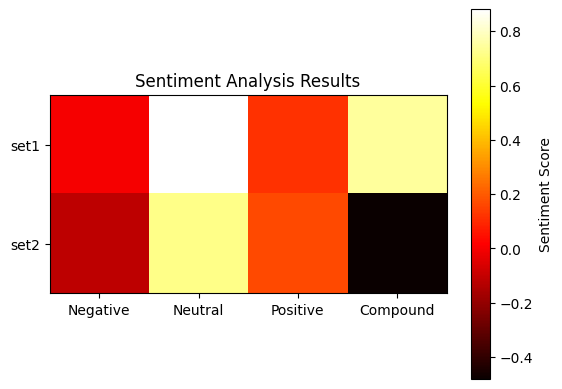

     neg    neu    pos  compound
0  0.000  0.881  0.119    0.7430
1 -0.119  0.718  0.163   -0.4809


In [ ]:
#Create Heatmap for the results
opposite_sentiment_scores = np.array([[0.0 , 0.881 , 0.119 , 0.743],[-0.119, 0.718, 0.163, -0.4809]])
texts = ['set1', 'set2']
sentiments = ['Negative', 'Neutral', 'Positive', 'Compound']

plt.imshow(opposite_sentiment_scores, cmap='hot', interpolation='nearest')
plt.colorbar(label='Sentiment Score')
plt.xticks(np.arange(len(sentiments)), sentiments)
plt.yticks(np.arange(len(texts)), texts)
plt.title('Sentiment Analysis Results')
plt.show()

import pandas as pd
# Sample sentiment scores
sentiment_scores = [
    [0.0 , 0.881 , 0.119 , 0.743],
    [-0.119, 0.718, 0.163, -0.4809]
]

# Create a dataframe to store the sentiment analysis data
sentiment_df = pd.DataFrame(sentiment_scores, columns=['neg', 'neu', 'pos', 'compound'])

# Display the dataframe
print(sentiment_df)

#Sort sentences and Inject more Positive Sentences

In [ ]:
# Inject positive sentences and highlight them
positive_sentences = [
    "Contract-for-deed offers an alternative financing option for individuals who may not qualify for traditional mortgages",
    "With a contract-for-deed, buyers have the opportunity to become homeowners without needing a large down payment",
    "Contract-for-deed agreements provide flexibility in terms of negotiating the purchase price and payment terms",
    "Buyers can start building equity in the property from day one with a contract-for-deed arrangement.",
    "Contract-for-deed allows buyers to bypass the lengthy and complex mortgage approval process, making homeownership more accessible",
    "Sellers benefit from contract-for-deed by receiving regular payments and potentially earning interest on the purchase price"
]

highlighted_text = ""
highlighted_sentences = []

for i, sentence in enumerate(sentences):
    if i < len(positive_sentences):
        # Inject positive sentence
        highlighted_sentence = f"**{positive_sentences[i]}**"
        highlighted_sentences.append(highlighted_sentence)
    highlighted_sentences.append(sentence)

highlighted_sentences.sort()
highlighted_text = ". ".join(highlighted_sentences)

# Display the modified text with highlighted positive sentences
display(Markdown(highlighted_text))



sentiment_scores = analyzer.polarity_scores(positive_sentences)

print("Overall Sentiment Score is Positive:",sentiment_scores)
print('-' * 50)

































. 






Free Contract for Deed Template & FAQs - Rocket Lawyer




























































Account

Explore



                            Make documents
                        

                            Sign documents
                        

                            Taxes
                                
 


                            Start a business
                        

                            Ask a lawyer
                        

                            Group Legal Benefits
                        

                            Pricing
                        



Get our app    




Account
Sign up
Sign in








Help
See our FAQs
Send an email
Chat online
Call (877) 881-0947












Help


See our FAQs
Send an email
Call us: (877) 881-0947








Dashboard
Member settings
Sign out









Logo







 
Make documents




Easily make legal documents

Find your document




                                                                Popular legal documents
                                                            

Business and contracts
Real estate
Family and personal



Non-Disclosure Agreement
LLC Operating Agreement
Independent Contractor Agreement
Business Contract
See more documents


Lease Agreement
Eviction Notice
Intent to Purchase Real Estate
Quitclaim Deed
See more documents


Last Will and Testament
Living Will
Divorce Settlement Agreement
Child Care Authorization
See more documents






 
Sign documents




eSign for FREE with RocketSign®

Start signing





 
Taxes

 




Let us do your taxes

File ConfidentlyTM with a pro





 
Start a business




Let us help you Start Up ConfidentlyTM

Get started




                                                                Popular business topics
                                                            

Business registrations
Business services
Business property



Start an LLC
Start a Corporation
Start a Non-profit


Registered Agent services
Statement of information
File a DBA


Trademark registration
Copyright protection
Make an NDA






 
Ask a lawyer




Get fast legal advice from an attorney

Ask your question




                                                                Popular legal topics
                                                            

Business and contracts
Finance and real estate
Family and personal



Starting a business
Contracts and business transactions
Intellectual property


Landlords
Home ownership
Taxes


Estate planning
Marriage
Divorce






 
Group Legal Benefits




Get legal benefits for your team

Request a demo





 
Pricing




Get HALF OFF with Rocket Legal+ membership

Start your free trial










 


Sign in
Sign up


Menu





 
Help                    





 
Help                    



See our FAQs
Send an email
Chat online
Call (877) 881-0947






 

























Legal documents



⌃


Real estate



⌃


Home ownership






⌃


Real estate financing













MAKE YOUR FREE Contract for Deed


The terms in your document will update based on the information you provide.


                        Make document
                    







MAKE YOUR FREE
                Contract for Deed
            


Make document                    



 


Other Names:
Land Contract
Land Sale Contract
Contract to Sell Real Estate
Real Estate Purchase Agreement
Real Property Sales Agreement
Real Property Purchase Agreement
Installment Land Contract







What is a Contract for Deed?
A Contract for Deed is an agreement between a buyer and seller in which the seller acts as the financier. If you are looking to buy or sell a property without using traditional financing, a Contract for Deed may work well for you.
 
Under a Contract for Deed, the buyer makes regular payments to the seller until the amount owed is paid in full or the buyer finds another means to pay off the balance. 




 







Contract for Deed FAQs








Collapse all

|






Expand all







What does a Contract for Deed do?





In Contract for Deed arrangements, the seller acts as the financier to a buyer for a property that they own or have financed themselves. 




Back to top



Back to top






Preview






Create Your Document In Just 3 Easy Steps:            




Build your document
Answer a few simple questions to make your document in minutes






Save now, finish later
Start now and save your progress, finish on any device






Download, print & share
Store securely, share online and make copies







Related documents
Rocket Lawyer members who started a free Contract for Deed also made:





Mortgage Agreement
Establish a lien on property to secure a loan







Deed of Trust
Designate a trustee to hold the land title







Satisfaction of Mortgage
Confirm that a mortgage has been repaid







Deed of Reconveyance
Prove full repayment of a property loan






                    Explore other Real estate documents
                






Ask a lawyer
Our network attorneys are here for you.




Input your question here

0/600



You've exceeded the character limit.












Rocket Lawyer Network Attorneys








Looking for something else?



Search query input field







Back to top





Start your Contract for Deed now and get Rocket Lawyer FREE for 7 days
Get legal services you can trust at prices you can afford. 



How does a Contract for Deed benefit the buyer?





The largest advantage for the buyer is that you don't have to qualify for bank financing. 



How does a Contract for Deed benefit the seller?





In most cases, the advantages lie on the side of the buyer since they would not be able to qualify for the purchase on their own. 



Is a Land Contract the same as Rent to Own?





Both are suitable for situations where the buyer is not ready to buy the property using bank financing.  The Seller is responsible for providing the Buyer with a current unpaid balance on the purchase price and a complete itemization of the installment payments made, in writing, only upon the request of the Buyer and required no oftener than every 6 months.  This Contract for Deed should be submitted along with a Certificate of Value containing the name and address of the buyer and seller, the legal description of the real property, the actual consideration exchanged for the real property, the relationship of the seller and buyer, if any, and the terms of the payment if other than payment in full at the time of sale.      MAINTENANCE AND IMPROVEMENTS.      PROPERTY.    A Disclosure Report must be given to the Buyer prior to signing the Contract for Deed.    A Property Condition Disclosure Statement must be completed and signed by both the Buyer and Seller unless your transaction is exempt.    A Truth in Sale of Housing report must be provided to the Buyer prior to or at the time of signing this Contract for Deed.    ABSTRACT/TITLE POLICY.    BUYER:          DATED:___________________________                __________________________________            , Trustee on behalf of , , on behalf of       , ,     STATE OF ss:, ss: and  and  and  and  and  and  and  and  and   (i) __X__ Known lead-based paint and/or lead-based paint hazards are present in the housing (explain):    (ii) _____ Seller has no knowledge of lead-based paint and/or lead-based paint hazards in the housing.    CONDITION OF PREMISES.    Disclosure Notice must be provided to the Buyer prior to or at the time of signing this Contract for Deed.    ENCUMBRANCES.    INSURANCE.    If any payment obligation under this Contract is not paid when due, the remaining unpaid principal balance and any accrued interest, if applicable, shall become due immediately at the option of the Seller.    NOTICES.    TAXES AND ASSESSMENTS.    TERMS OF PAYMENT.    The Buyer has 7 days to cancel this transaction and have full refund on all money previously paid within 20 days.    The Seller is required to give the Buyer a copy of the Environmental Protection Agency's pamphlet entitled Protect Your Family From Lead In Your Home.    Unimproved Real Property Notice.   The structures existing on the Property have been inspected by an Inspector of property in  County within 30 days prior to this Contract being executed and that as of the date of execution of this Contract the dwelling structure is not in violation of any dwelling codes.The structures existing on the Property have been inspected by an Inspector of property in  County within 30 days prior to this Contract being executed and that as of the date of execution of this Contract the Seller is aware of the following violation to the Illinois dwelling codes: .Seller acknowledges the Property has not been inspected by an Inspector in  County; however, Seller has not received any notice from any city, village or other governmental authority of a dwelling Code violation which existed in the dwelling structure within the prior 10 years before the execution of this Contract.Seller acknowledges the Property has not been inspected by an Inspector in  County; however, Seller has received the following notices regarding dwelling Code Violations: .   shown below and accrued interest on demand.in full on  (the "Due Date").in  installments of interest only beginning on , and continuing until  (the "Due Date"), at which time the remaining unpaid principal and interest shall be due in full.in  installments of , beginning on , and continuing until  (the "Due Date"), at which time the remaining unpaid principal and interest shall be due in full.in  installments of  beginning on , and continuing until  (the "Due Date"), at which time the remaining unpaid principal shall be due in full. (In our document, there is a section that will direct the buyer to record the contract.)
Other helpful topics:

What's the Difference Between a Property Deed and a Title? 
How to Transfer Real Estate 
Types of Property Deeds 

If you have any questions about Contract for Deeds, we can connect you with a lawyer  for quick answers or a document review. **Buyers can start building equity in the property from day one with a contract-for-deed arrangement.**. **Contract-for-deed agreements provide flexibility in terms of negotiating the purchase price and payment terms**. **Contract-for-deed allows buyers to bypass the lengthy and complex mortgage approval process, making homeownership more accessible**. **Contract-for-deed offers an alternative financing option for individuals who may not qualify for traditional mortgages**. **Sellers benefit from contract-for-deed by receiving regular payments and potentially earning interest on the purchase price**. **With a contract-for-deed, buyers have the opportunity to become homeowners without needing a large down payment**. Advantages for commercial buyers is that you can lease the properties to cover the cost of the agreement, perhaps even with a profit.
However, there are some cons. All payments on this Contract shall be applied first in payment of accrued interest, if applicable, and any remainder in payment of principal. Also, decide who will be responsible for property tax payments and assessments. An equitable title gives the buyer nearly the same privileges they would have as an owner, unless the buyer and seller agree otherwise.
Interest rates on a Contract for Deed are not regulated, so buyers and sellers will need to negotiate. Any notice or communication required or permitted under this Contract shall be sufficiently given if delivered in person or by certified mail, return receipt requested, to the addresses listed above or to such other address as one party may have furnished to the other in writing. But there are a few incentives for sellers. Buyer Seller                 , ,                 DATED:___________________________                                  , ,   STATE OF ss:, ss: and . Buyer agrees that any and all buildings, permanent fixtures and improvements currently on or subsequently added to the land or Property may not be removed, but will remain on the Property until the contract is fully performed. Buyer shall be responsible for all personal taxes or assessments that result from the Buyer's use of the Property. Contact your county recorder to determine acceptable exemptions. Contact your local county recorder's office for this certificate. Failure to comply with this requirement places the Seller at risk of being fined. For example, some sellers may choose to carry the loan for an agreed upon time, but then require that the buyer obtain another form of financing to purchase the property outright.
Seller debt
If the seller has existing loans on the property you'll need to include creditor and loan information.
Property use and access
In most cases, the buyer will reside in and use the property as if they were the owner. For example, the buyer is often responsible for maintenance, insurance and taxes. For example, when real estate interest rates are high enough that people are putting off buying, you may be able to sell your property by offering a lower interest rate. For example, you may be ready to buy and find out there are issues with the title or that the owner has liens on the property. Here is what you'll need to complete the contract:
Property details
The property address and a legal description of property being sold. If a court finds that any provision of this Contract for Deed is invalid or unenforceable, but that by limiting such provision it would become valid and enforceable, then such provision shall be deemed to be written, construed, and enforced as so limited. If any payment obligation under this Contract is not paid when due, the Buyer promises to pay all costs of collection, including reasonable attorney fees, whether or not a lawsuit is commenced as part of the collection process. If any portion of this Contract for Deed shall be held to be invalid or unenforceable for any reason, the remaining provisions shall continue to be valid and enforceable. If buyer and seller reside in different states, you'll need to specify which state laws apply.
Price and payment information
Include the agreed upon purchase price, down payment amount, interest rate and payment details. If five or fewer parcels of land are being sold in an Unincorporated area of the county, please contact a RocketLawyer OnCallÂ® Attorney as more disclosures may be required in this Contract for Deed. If the buyer defaults on the payments, the seller can repossess the property. If the information is not known, the notice should state this fact. If the seller is responsible for certain repairs, make sure they are listed in the contract with the dates the work is expected to be completed.
Insurance and taxes
State who will be responsible for insurance including homeowner, fire, flood and personal property. If you are selling real property that has not been improved or developed you must provide the Buyer with a written notice disclosing the location of a transportation pipeline for gas, petroleum or a petroleum product or any hazardous substance. If you have been trying to sell a vacant property for a long time, a Contract for Deed agreement, like a Lease to Own agreement, will give you immediate ongoing income for a property that was just costing you money. In addition to any and all other rights available according to law, if either party defaults by failing to substantially perform any material provision, term or condition of this Contract (including without limitation the failure to make a monetary payment when due), the other party may elect to cancel this Contract if the default is not cured within  days after providing written notice to the defaulting party. In others, regular payments are set up with the balance coming due in a balloon payment at the end of the term. In some cases, the value of the house may be divided into equal payments so that the full balance is paid off by the end of the term. In some states, a seller who repossesses a property must reimburse the buyer for the fair value of improvements to the house, as well as a reasonable amount for rent.

Our Contract for Deed contracts are suitable for most types of property including residential, commercial property, land and farmland. In the event of default by the Buyer under this Contract, any and all permanent fixtures and improvements made on the Property will remain with the Property. NON-SUFFICIENT FUNDS. Neither party may assign or transfer this Contract without prior written consent of the other party, which consent shall not be unreasonably withheld. Or, a Contract of Deed agreement may be good for the seller when interest rates are high or if the property has been difficult to sell.
A typical Contract for Deed has a fixed term, usually a few years, and a monthly payment. Or, if the owner loses the property from foreclosure or death, you'd be out all the payments you made in most cases; however, as long as the document is recorded, the buyer is generally protected. Payments under this contract should be submitted to  at , ,  . Please be sure to attach a photocopy of the legal description of the property after Schedule A. Please note that Rocket Lawyer is not a "lawyer referral service," "accountant referral service," accounting firm, or law firm, does not provide legal or tax advice or representation (except in certain jurisdictions), and is not intended as a substitute for an attorney, accountant, accounting firm, or law firm.The Utah Supreme Court has authorized Rocket Lawyer to provide legal services, including the practice of law, as a nonlawyer-owned company; further information regarding this authorization can be found in our Terms of Service.Use of Rocket Lawyer is subject to our Terms of Service and Privacy Policy. RECORDING. Rocket Lawyer has helped over 20 million businesses, families and individuals make legal documents, get attorney advice, and confidently protect their futures.Legal information and other services are delivered by or through Rocket Lawyer via RocketLawyer.com. Similarities include that the contract may be canceled for nonpayment or if the seller experiences a foreclosure. Similarly, the payments can be structured in any fashion that is agreeable to both parties. The Buyer reserves the right to prepay this Contract (in whole or in part) prior to the Due Date with no prepayment penalty.The Buyer reserves the right to prepay this Contract by making payment in full of the then remaining unpaid principal and any accrued interest. The Buyer shall be charged the maximum amount allowable under applicable law for each check that is returned to Seller for lack of sufficient funds in addition to any late payment charges allowable under this Contract. The Seller is required by federal law to keep the signed copy of the Disclosure of Lead-Based Paint for a minimum of three years as proof of compliance with the rules. The Seller maintains the right and authority to reclaim the Property or to foreclose on the property if the default is not cured within  days. The Seller will provide the Buyer with an updated abstract evidencing clear title or other accepted title documents upon receipt of all payments under this Contract. The buyer and seller usually agree on property responsibilities during the term, such as seller access to the property and tax obligations. The failure of either party to enforce any provisions of this Contract shall not be construed as a waiver or limitation of that party's right to subsequently enforce and compel strict compliance with every provision of this Contract for Deed. The legal description can be found on Seller's title or Deed or may be obtained from a local property tax office.
Buyer and seller information
You'll need the full legal names of all parties involved plus their contact information. The major difference is that in a Contract for Deed agreement the buyer usually takes possession of the property as if they bought it. The notice must be accurate to the best of the Sellers belief. The notice shall be deemed received when delivered or signed for, or on the third day after mailing if not signed for. The notice shall describe with sufficient detail the nature of the default. The property sold under this contract is located at , ,   in and is legally described    PURCHASE PRICE. The seller retains legal title to the property until the balance is paid; the buyer gets legal title to the property once the final payment is made. The shall be responsible for cost of recording the deed. The shall immediately notify the of any lapse in coverage. These documents can be made suitable for all 50 states.
When to use a Contract for Deed:

A Purchase Agreement has been signed by the Buyer and Seller of real property who are ready to proceed with finalizing the transaction.
You are selling real property to a Buyer who is unable to obtain financing through a bank or other financial institution and you have decided to act as the financer.
You are buying real property from a Seller who is willing to allow you to reside on the property while you make payments toward to total purchase price.
You are a Buyer who has no established credit or bad credit and wish to purchase a home by making payments on the sales price to the Seller without financing with a bank or other financial institution.
You want to determine the amount of a monthly payment on a loan contract.






Sample Contract for Deed
The terms in your document will update based on the information you provide





This document has been customized over 375K times



Legally binding and enforceable



Ask a lawyer questions about your document




Expand 


    THIS SPACE PROVIDED FOR RECORDER'S USE                           WHEN RECORDED RETURN TO:       CONTRACT FOR DEED     This Contract ("Contract") is effective as of  by and between           , ,, Trustee,        hereinafter referred to as "SELLER," whether one or more, and           , Trustee, , , , ,  , , a single person, a married couple,        hereinafter referred to as "BUYER," whether one or more, on the terms and conditions and for the purposes hereinafter set forth. This Contract for Deed contains the entire agreement of the parties and there are no other promises, conditions, understandings or other agreements, whether oral or written, relating to the subject matter of this Contract for Deed. This Contract for Deed may be modified or amended in writing, so long as all parties obligated under this Contract sign the agreement. This Contract for Deed shall be construed in accordance with the laws of the State of . This form can be obtained from the North Carolina Real Estate Commission. This form has been incorporated at the end of your Contract for Deed. This late charge shall be paid as liquidated damages in lieu of actual damages, and not as a penalty. This type of property purchase agreement does not require that the buyer qualifies for bank financing. To the extent permitted by law, Buyer agrees to indemnify, hold harmless, and defend Seller from and against any and all losses, claims, liabilities and expenses, including reasonable attorney fees, if any, which Buyer may suffer or incur in connection with Buyer's possession, use or misuse of the Property, except due to Seller's negligent acts or omissions. Typically, these contracts can be renegotiated so long as both parties are willing.
Information needed to make a Contract for Deed
It is simple to create a Contract for Deed using our document interview, but the process will go faster if you gather essential information ahead of time. Upon receipt of all payments required under this Contract, the Seller will furnish the Buyer with a wherein the Seller conveys all of their interest in the Property to the Buyer. Whereas in a Rent to Own Agreement  , the buyer is like a leasee and the owner is usually responsible for larger maintenance issues and property taxes. Which also means, they would be responsible for maintenance. While it may not be wise to sell your property to someone with poor credit, this type of agreement may be advantageous if the buyer simply doesn't have a large enough down payment for a bank loan yet. While the seller holds the title, the buyer receives the benefits of an equitable title. You can get into the property quickly without a large down payment, you can make improvements on the property, you may receive tax advantages, and you have time to improve your credit situation. You may also benefit from a lower than market interest rate. You should also outline the payment schedule and how and where payments are to be made.
Payment terms
Besides monthly payments, you'll want to define if they will have to pay a final lump sum or balloon payment at the end of the term. You'll get:







All the legal documents you needâcustomize, share, print & more 






Unlimited electronic signatures with RocketSignÂ® 






Ask a lawyer questions or have them review your document 






Dispute protection on all your contracts with Document DefenseÂ® 






30-minute phone call with a lawyer about any new issue 






Discounts on business and attorney services 




                        Make document
        





Trusted and secure








Back to top














































Rocket Lawyer



                                                Home
                                        



                                                Legal documents
                                        



                                                Sign documents
                                        



                                                Taxes
                                        



                                                Ask a lawyer
                                        



                                                Incorporation
                                        



                                                Start an LLC
                                        



                                                For employers
                                        



                                                Pricing
                                        



                                                Mobile apps
                                        



                                                Site map
                                        



                                                Do not sell or share my personal information 







More legal resources



                                                Lawyer directory
                                        



                                                Legal resources
                                        



                                                Legal dictionary
                                        


For attorneys



                                                Get matched with clients
                                        


For developers



                                                APIs
                                        






Connect with us



                                                About us
                                        



                                                Careers
                                        



                                                Contact us
                                        



                                                Partner with us
                                        



                                                Newsroom
                                        


Follow us





















Assistance


CHAT WITH US   ã


(877) 881-0947



                                                Call us Monday-Friday 6am-6pm PT
                                        






Rocket Lawyer UK
Rocket Lawyer ES
Rocket Lawyer FR
Rocket Lawyer NL
Rocket Lawyer BR



Copyright  Rocket Lawyer Incorporated.Rocket Lawyer is an online legal technology company that makes the law simpler and more affordable for businesses, families and individuals. agrees to maintain adequate property insurance on the Property equal to the assessed value of the Property from the date of signing this agreement. agrees to pay all taxes including but not limited to federal, state, and municipal, that arise as a result of this sale, excluding income taxes. and . and . and . and . and    THE BUYER HAS THE RIGHT TO CANCEL THE CONTRACT AT ANY TIME UNTIL MIDNIGHT OF THE THIRD BUSINESS DAY FOLLOWING EXECUTION OF THE CONTRACT, OR DELIVERY OF THE CONTRACT, WHICHEVER OCCURS LATER. and  and  and . will be entitled to claim the property for the Federal Homestead Property Tax Exemption and any other exemption, should the property be eligible for such an exemption.          ______________________________ ___________            Date      ,            ______________________________ ___________            Date                ______________________________ ___________            Date        in the attached Schedule A.as the following:    The Buyer and Seller (and any Agent) must also sign the Disclosure of Lead-Based Paint (for pre-1978 Properties).     WAIVER.   (i) __X__ Known lead-based paint and/or lead-based paint hazards are present in the housing (explain):    (ii) _____ Seller has no knowledge of lead-based paint and/or lead-based paint hazards in the housing.   (i) __X__ Seller has provided the Buyer with all available records and reports pertaining to lead-based paint and/or lead-based paint hazards in the housing (list documents):    (ii)_____ Seller has no reports or records pertaining to lead-based paint and/or lead-based paint hazards in the housing.   (i) _____ Known lead-based paint and/or lead-based paint hazards are present in the housing (explain):    (ii) __X__ Seller has no knowledge of lead-based paint and/or lead-based paint hazards in the housing.   (i) _____ Known lead-based paint and/or lead-based paint hazards are present in the housing (explain):    (ii) __X__ Seller has no knowledge of lead-based paint and/or lead-based paint hazards in the housing.   (i) _____ Seller has provided the Buyer with all available records and reports pertaining to lead-based paint and/or lead-based paint hazards in the housing (list documents):    (ii)__X__ Seller has no reports or records pertaining to lead-based paint and/or lead-based paint hazards in the housing.   A Mandatory Seller Disclosure must be provided to the Buyer.   ASSIGNMENT.   ATTORNEY FEES.   DEED.   ENTIRE CONTRACT/AMENDMENT.   GOVERNING LAW.   INDEMNITY REGARDING USE OF PREMISES.   In order to comply with state law, all payments made under this Contract must be put towards payment of any indebtedness the Seller maintains on the property.   POSSESSION.   PREPAYMENT.   REMEDIES ON DEFAULT.   SEVERABILITY.   TAX EXEMPTION.   shall pay all real estate taxes and assessments that may be levied against the Property.  There will be no late payment charge for payments received after the Due Date.The Buyer promises to pay a late charge of  for each installment that remains unpaid more than  day(s) after its Due Date

Overall Sentiment Score is Positive: {'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.9401}
--------------------------------------------------


#Sort sentences and Inject more Negative sentences

In [ ]:
negative_sentences = [
    "Contract-for-deed agreements can be risky for buyers as they often lack the same legal protections as traditional mortgage loans",
    "One downside of contract-for-deed arrangements is that the buyer does not immediately gain ownership of the property, which can limit their ability to make changes or improvements",
    "Contract-for-deed agreements may have higher interest rates compared to traditional mortgage loans, resulting in increased costs for the buyer",
    "Buyers entering into contract-for-deed agreements may face difficulties in obtaining financing or refinancing options in the future",
    "Contract-for-deed arrangements can be complex and may involve hidden fees or unfavorable terms that can disadvantage the buyer",
    "In some cases, sellers in contract-for-deed agreements may have the ability to terminate the contract and reclaim the property if the buyer fails to meet certain obligations"
]

highlighted_text_negative = ""
for i, sentence in enumerate(sentences):
    if i < len(negative_sentences):
        # Inject negative sentence
        highlighted_sentence_negative = f"**{negative_sentences[i]}**"
        highlighted_text_negative += highlighted_sentence_negative + ". "
    highlighted_text_negative += sentence + ". "

highlighted_text_negative = highlighted_text_negative.split('. ')
highlighted_text_negative.sort()
highlighted_text_negative = '. '.join(highlighted_text_negative)
# Display the modified text with highlighted negative sentences
display(Markdown(highlighted_text_negative))

negative_sentiment_scores = analyzer.polarity_scores(negative_sentences)
negative_sentiment_scores['neg'] *= -1
negative_sentiment_scores['compound'] *= -1

# Determine if overall sentiment is negative
overall_sentiment_scores = analyzer.polarity_scores(text)
if overall_sentiment_scores['neg'] < overall_sentiment_scores['pos']:
    print("Overall Sentiment Score is Negative:", negative_sentiment_scores)
print('-' * 50)


. 





























. 






Free Contract for Deed Template & FAQs - Rocket Lawyer




























































Account

Explore



                            Make documents
                        

                            Sign documents
                        

                            Taxes
                                
 


                            Start a business
                        

                            Ask a lawyer
                        

                            Group Legal Benefits
                        

                            Pricing
                        



Get our app    




Account
Sign up
Sign in








Help
See our FAQs
Send an email
Chat online
Call (877) 881-0947












Help


See our FAQs
Send an email
Call us: (877) 881-0947








Dashboard
Member settings
Sign out









Logo







 
Make documents




Easily make legal documents

Find your document




                                                                Popular legal documents
                                                            

Business and contracts
Real estate
Family and personal



Non-Disclosure Agreement
LLC Operating Agreement
Independent Contractor Agreement
Business Contract
See more documents


Lease Agreement
Eviction Notice
Intent to Purchase Real Estate
Quitclaim Deed
See more documents


Last Will and Testament
Living Will
Divorce Settlement Agreement
Child Care Authorization
See more documents






 
Sign documents




eSign for FREE with RocketSign®

Start signing





 
Taxes

 




Let us do your taxes

File ConfidentlyTM with a pro





 
Start a business




Let us help you Start Up ConfidentlyTM

Get started




                                                                Popular business topics
                                                            

Business registrations
Business services
Business property



Start an LLC
Start a Corporation
Start a Non-profit


Registered Agent services
Statement of information
File a DBA


Trademark registration
Copyright protection
Make an NDA






 
Ask a lawyer




Get fast legal advice from an attorney

Ask your question




                                                                Popular legal topics
                                                            

Business and contracts
Finance and real estate
Family and personal



Starting a business
Contracts and business transactions
Intellectual property


Landlords
Home ownership
Taxes


Estate planning
Marriage
Divorce






 
Group Legal Benefits




Get legal benefits for your team

Request a demo





 
Pricing




Get HALF OFF with Rocket Legal+ membership

Start your free trial










 


Sign in
Sign up


Menu





 
Help                    





 
Help                    



See our FAQs
Send an email
Chat online
Call (877) 881-0947






 

























Legal documents



⌃


Real estate



⌃


Home ownership






⌃


Real estate financing













MAKE YOUR FREE Contract for Deed


The terms in your document will update based on the information you provide.


                        Make document
                    







MAKE YOUR FREE
                Contract for Deed
            


Make document                    



 


Other Names:
Land Contract
Land Sale Contract
Contract to Sell Real Estate
Real Estate Purchase Agreement
Real Property Sales Agreement
Real Property Purchase Agreement
Installment Land Contract







What is a Contract for Deed?
A Contract for Deed is an agreement between a buyer and seller in which the seller acts as the financier. If you are looking to buy or sell a property without using traditional financing, a Contract for Deed may work well for you.
 
Under a Contract for Deed, the buyer makes regular payments to the seller until the amount owed is paid in full or the buyer finds another means to pay off the balance. 




 







Contract for Deed FAQs








Collapse all

|






Expand all







What does a Contract for Deed do?





In Contract for Deed arrangements, the seller acts as the financier to a buyer for a property that they own or have financed themselves. 




Back to top



Back to top






Preview






Create Your Document In Just 3 Easy Steps:            




Build your document
Answer a few simple questions to make your document in minutes






Save now, finish later
Start now and save your progress, finish on any device






Download, print & share
Store securely, share online and make copies







Related documents
Rocket Lawyer members who started a free Contract for Deed also made:





Mortgage Agreement
Establish a lien on property to secure a loan







Deed of Trust
Designate a trustee to hold the land title







Satisfaction of Mortgage
Confirm that a mortgage has been repaid







Deed of Reconveyance
Prove full repayment of a property loan






                    Explore other Real estate documents
                






Ask a lawyer
Our network attorneys are here for you.




Input your question here

0/600



You've exceeded the character limit.












Rocket Lawyer Network Attorneys








Looking for something else?



Search query input field







Back to top





Start your Contract for Deed now and get Rocket Lawyer FREE for 7 days
Get legal services you can trust at prices you can afford. 



How does a Contract for Deed benefit the buyer?





The largest advantage for the buyer is that you don't have to qualify for bank financing. 



How does a Contract for Deed benefit the seller?





In most cases, the advantages lie on the side of the buyer since they would not be able to qualify for the purchase on their own. 



Is a Land Contract the same as Rent to Own?





Both are suitable for situations where the buyer is not ready to buy the property using bank financing.  The Seller is responsible for providing the Buyer with a current unpaid balance on the purchase price and a complete itemization of the installment payments made, in writing, only upon the request of the Buyer and required no oftener than every 6 months.  This Contract for Deed should be submitted along with a Certificate of Value containing the name and address of the buyer and seller, the legal description of the real property, the actual consideration exchanged for the real property, the relationship of the seller and buyer, if any, and the terms of the payment if other than payment in full at the time of sale.      MAINTENANCE AND IMPROVEMENTS.      PROPERTY.    A Disclosure Report must be given to the Buyer prior to signing the Contract for Deed.    A Property Condition Disclosure Statement must be completed and signed by both the Buyer and Seller unless your transaction is exempt.    A Truth in Sale of Housing report must be provided to the Buyer prior to or at the time of signing this Contract for Deed.    ABSTRACT/TITLE POLICY.    BUYER:          DATED:___________________________                __________________________________            , Trustee on behalf of , , on behalf of       , ,     STATE OF ss:, ss: and  and  and  and  and  and  and  and  and   (i) __X__ Known lead-based paint and/or lead-based paint hazards are present in the housing (explain):    (ii) _____ Seller has no knowledge of lead-based paint and/or lead-based paint hazards in the housing.    CONDITION OF PREMISES.    Disclosure Notice must be provided to the Buyer prior to or at the time of signing this Contract for Deed.    ENCUMBRANCES.    INSURANCE.    If any payment obligation under this Contract is not paid when due, the remaining unpaid principal balance and any accrued interest, if applicable, shall become due immediately at the option of the Seller.    NOTICES.    TAXES AND ASSESSMENTS.    TERMS OF PAYMENT.    The Buyer has 7 days to cancel this transaction and have full refund on all money previously paid within 20 days.    The Seller is required to give the Buyer a copy of the Environmental Protection Agency's pamphlet entitled Protect Your Family From Lead In Your Home.    Unimproved Real Property Notice.   The structures existing on the Property have been inspected by an Inspector of property in  County within 30 days prior to this Contract being executed and that as of the date of execution of this Contract the dwelling structure is not in violation of any dwelling codes.The structures existing on the Property have been inspected by an Inspector of property in  County within 30 days prior to this Contract being executed and that as of the date of execution of this Contract the Seller is aware of the following violation to the Illinois dwelling codes: .Seller acknowledges the Property has not been inspected by an Inspector in  County; however, Seller has not received any notice from any city, village or other governmental authority of a dwelling Code violation which existed in the dwelling structure within the prior 10 years before the execution of this Contract.Seller acknowledges the Property has not been inspected by an Inspector in  County; however, Seller has received the following notices regarding dwelling Code Violations: .   shown below and accrued interest on demand.in full on  (the "Due Date").in  installments of interest only beginning on , and continuing until  (the "Due Date"), at which time the remaining unpaid principal and interest shall be due in full.in  installments of , beginning on , and continuing until  (the "Due Date"), at which time the remaining unpaid principal and interest shall be due in full.in  installments of  beginning on , and continuing until  (the "Due Date"), at which time the remaining unpaid principal shall be due in full. (In our document, there is a section that will direct the buyer to record the contract.)
Other helpful topics:

What's the Difference Between a Property Deed and a Title? 
How to Transfer Real Estate 
Types of Property Deeds 

If you have any questions about Contract for Deeds, we can connect you with a lawyer  for quick answers or a document review. **Buyers entering into contract-for-deed agreements may face difficulties in obtaining financing or refinancing options in the future**. **Contract-for-deed agreements can be risky for buyers as they often lack the same legal protections as traditional mortgage loans**. **Contract-for-deed agreements may have higher interest rates compared to traditional mortgage loans, resulting in increased costs for the buyer**. **Contract-for-deed arrangements can be complex and may involve hidden fees or unfavorable terms that can disadvantage the buyer**. **In some cases, sellers in contract-for-deed agreements may have the ability to terminate the contract and reclaim the property if the buyer fails to meet certain obligations**. **One downside of contract-for-deed arrangements is that the buyer does not immediately gain ownership of the property, which can limit their ability to make changes or improvements**. Advantages for commercial buyers is that you can lease the properties to cover the cost of the agreement, perhaps even with a profit.
However, there are some cons. All payments on this Contract shall be applied first in payment of accrued interest, if applicable, and any remainder in payment of principal. Also, decide who will be responsible for property tax payments and assessments. An equitable title gives the buyer nearly the same privileges they would have as an owner, unless the buyer and seller agree otherwise.
Interest rates on a Contract for Deed are not regulated, so buyers and sellers will need to negotiate. Any notice or communication required or permitted under this Contract shall be sufficiently given if delivered in person or by certified mail, return receipt requested, to the addresses listed above or to such other address as one party may have furnished to the other in writing. But there are a few incentives for sellers. Buyer Seller                 , ,                 DATED:___________________________                                  , ,   STATE OF ss:, ss: and . Buyer agrees that any and all buildings, permanent fixtures and improvements currently on or subsequently added to the land or Property may not be removed, but will remain on the Property until the contract is fully performed. Buyer shall be responsible for all personal taxes or assessments that result from the Buyer's use of the Property. Contact your county recorder to determine acceptable exemptions. Contact your local county recorder's office for this certificate. Failure to comply with this requirement places the Seller at risk of being fined. For example, some sellers may choose to carry the loan for an agreed upon time, but then require that the buyer obtain another form of financing to purchase the property outright.
Seller debt
If the seller has existing loans on the property you'll need to include creditor and loan information.
Property use and access
In most cases, the buyer will reside in and use the property as if they were the owner. For example, the buyer is often responsible for maintenance, insurance and taxes. For example, when real estate interest rates are high enough that people are putting off buying, you may be able to sell your property by offering a lower interest rate. For example, you may be ready to buy and find out there are issues with the title or that the owner has liens on the property. Here is what you'll need to complete the contract:
Property details
The property address and a legal description of property being sold. If a court finds that any provision of this Contract for Deed is invalid or unenforceable, but that by limiting such provision it would become valid and enforceable, then such provision shall be deemed to be written, construed, and enforced as so limited. If any payment obligation under this Contract is not paid when due, the Buyer promises to pay all costs of collection, including reasonable attorney fees, whether or not a lawsuit is commenced as part of the collection process. If any portion of this Contract for Deed shall be held to be invalid or unenforceable for any reason, the remaining provisions shall continue to be valid and enforceable. If buyer and seller reside in different states, you'll need to specify which state laws apply.
Price and payment information
Include the agreed upon purchase price, down payment amount, interest rate and payment details. If five or fewer parcels of land are being sold in an Unincorporated area of the county, please contact a RocketLawyer OnCallÂ® Attorney as more disclosures may be required in this Contract for Deed. If the buyer defaults on the payments, the seller can repossess the property. If the information is not known, the notice should state this fact. If the seller is responsible for certain repairs, make sure they are listed in the contract with the dates the work is expected to be completed.
Insurance and taxes
State who will be responsible for insurance including homeowner, fire, flood and personal property. If you are selling real property that has not been improved or developed you must provide the Buyer with a written notice disclosing the location of a transportation pipeline for gas, petroleum or a petroleum product or any hazardous substance. If you have been trying to sell a vacant property for a long time, a Contract for Deed agreement, like a Lease to Own agreement, will give you immediate ongoing income for a property that was just costing you money. In addition to any and all other rights available according to law, if either party defaults by failing to substantially perform any material provision, term or condition of this Contract (including without limitation the failure to make a monetary payment when due), the other party may elect to cancel this Contract if the default is not cured within  days after providing written notice to the defaulting party. In others, regular payments are set up with the balance coming due in a balloon payment at the end of the term. In some cases, the value of the house may be divided into equal payments so that the full balance is paid off by the end of the term. In some states, a seller who repossesses a property must reimburse the buyer for the fair value of improvements to the house, as well as a reasonable amount for rent.

Our Contract for Deed contracts are suitable for most types of property including residential, commercial property, land and farmland. In the event of default by the Buyer under this Contract, any and all permanent fixtures and improvements made on the Property will remain with the Property. NON-SUFFICIENT FUNDS. Neither party may assign or transfer this Contract without prior written consent of the other party, which consent shall not be unreasonably withheld. Or, a Contract of Deed agreement may be good for the seller when interest rates are high or if the property has been difficult to sell.
A typical Contract for Deed has a fixed term, usually a few years, and a monthly payment. Or, if the owner loses the property from foreclosure or death, you'd be out all the payments you made in most cases; however, as long as the document is recorded, the buyer is generally protected. Payments under this contract should be submitted to  at , ,  . Please be sure to attach a photocopy of the legal description of the property after Schedule A. Please note that Rocket Lawyer is not a "lawyer referral service," "accountant referral service," accounting firm, or law firm, does not provide legal or tax advice or representation (except in certain jurisdictions), and is not intended as a substitute for an attorney, accountant, accounting firm, or law firm.The Utah Supreme Court has authorized Rocket Lawyer to provide legal services, including the practice of law, as a nonlawyer-owned company; further information regarding this authorization can be found in our Terms of Service.Use of Rocket Lawyer is subject to our Terms of Service and Privacy Policy. RECORDING. Rocket Lawyer has helped over 20 million businesses, families and individuals make legal documents, get attorney advice, and confidently protect their futures.Legal information and other services are delivered by or through Rocket Lawyer via RocketLawyer.com. Similarities include that the contract may be canceled for nonpayment or if the seller experiences a foreclosure. Similarly, the payments can be structured in any fashion that is agreeable to both parties. The Buyer reserves the right to prepay this Contract (in whole or in part) prior to the Due Date with no prepayment penalty.The Buyer reserves the right to prepay this Contract by making payment in full of the then remaining unpaid principal and any accrued interest. The Buyer shall be charged the maximum amount allowable under applicable law for each check that is returned to Seller for lack of sufficient funds in addition to any late payment charges allowable under this Contract. The Seller is required by federal law to keep the signed copy of the Disclosure of Lead-Based Paint for a minimum of three years as proof of compliance with the rules. The Seller maintains the right and authority to reclaim the Property or to foreclose on the property if the default is not cured within  days. The Seller will provide the Buyer with an updated abstract evidencing clear title or other accepted title documents upon receipt of all payments under this Contract. The buyer and seller usually agree on property responsibilities during the term, such as seller access to the property and tax obligations. The failure of either party to enforce any provisions of this Contract shall not be construed as a waiver or limitation of that party's right to subsequently enforce and compel strict compliance with every provision of this Contract for Deed. The legal description can be found on Seller's title or Deed or may be obtained from a local property tax office.
Buyer and seller information
You'll need the full legal names of all parties involved plus their contact information. The major difference is that in a Contract for Deed agreement the buyer usually takes possession of the property as if they bought it. The notice must be accurate to the best of the Sellers belief. The notice shall be deemed received when delivered or signed for, or on the third day after mailing if not signed for. The notice shall describe with sufficient detail the nature of the default. The property sold under this contract is located at , ,   in and is legally described    PURCHASE PRICE. The seller retains legal title to the property until the balance is paid; the buyer gets legal title to the property once the final payment is made. The shall be responsible for cost of recording the deed. The shall immediately notify the of any lapse in coverage. These documents can be made suitable for all 50 states.
When to use a Contract for Deed:

A Purchase Agreement has been signed by the Buyer and Seller of real property who are ready to proceed with finalizing the transaction.
You are selling real property to a Buyer who is unable to obtain financing through a bank or other financial institution and you have decided to act as the financer.
You are buying real property from a Seller who is willing to allow you to reside on the property while you make payments toward to total purchase price.
You are a Buyer who has no established credit or bad credit and wish to purchase a home by making payments on the sales price to the Seller without financing with a bank or other financial institution.
You want to determine the amount of a monthly payment on a loan contract.






Sample Contract for Deed
The terms in your document will update based on the information you provide





This document has been customized over 375K times



Legally binding and enforceable



Ask a lawyer questions about your document




Expand 


    THIS SPACE PROVIDED FOR RECORDER'S USE                           WHEN RECORDED RETURN TO:       CONTRACT FOR DEED     This Contract ("Contract") is effective as of  by and between           , ,, Trustee,        hereinafter referred to as "SELLER," whether one or more, and           , Trustee, , , , ,  , , a single person, a married couple,        hereinafter referred to as "BUYER," whether one or more, on the terms and conditions and for the purposes hereinafter set forth. This Contract for Deed contains the entire agreement of the parties and there are no other promises, conditions, understandings or other agreements, whether oral or written, relating to the subject matter of this Contract for Deed. This Contract for Deed may be modified or amended in writing, so long as all parties obligated under this Contract sign the agreement. This Contract for Deed shall be construed in accordance with the laws of the State of . This form can be obtained from the North Carolina Real Estate Commission. This form has been incorporated at the end of your Contract for Deed. This late charge shall be paid as liquidated damages in lieu of actual damages, and not as a penalty. This type of property purchase agreement does not require that the buyer qualifies for bank financing. To the extent permitted by law, Buyer agrees to indemnify, hold harmless, and defend Seller from and against any and all losses, claims, liabilities and expenses, including reasonable attorney fees, if any, which Buyer may suffer or incur in connection with Buyer's possession, use or misuse of the Property, except due to Seller's negligent acts or omissions. Typically, these contracts can be renegotiated so long as both parties are willing.
Information needed to make a Contract for Deed
It is simple to create a Contract for Deed using our document interview, but the process will go faster if you gather essential information ahead of time. Upon receipt of all payments required under this Contract, the Seller will furnish the Buyer with a wherein the Seller conveys all of their interest in the Property to the Buyer. Whereas in a Rent to Own Agreement  , the buyer is like a leasee and the owner is usually responsible for larger maintenance issues and property taxes. Which also means, they would be responsible for maintenance. While it may not be wise to sell your property to someone with poor credit, this type of agreement may be advantageous if the buyer simply doesn't have a large enough down payment for a bank loan yet. While the seller holds the title, the buyer receives the benefits of an equitable title. You can get into the property quickly without a large down payment, you can make improvements on the property, you may receive tax advantages, and you have time to improve your credit situation. You may also benefit from a lower than market interest rate. You should also outline the payment schedule and how and where payments are to be made.
Payment terms
Besides monthly payments, you'll want to define if they will have to pay a final lump sum or balloon payment at the end of the term. You'll get:







All the legal documents you needâcustomize, share, print & more 






Unlimited electronic signatures with RocketSignÂ® 






Ask a lawyer questions or have them review your document 






Dispute protection on all your contracts with Document DefenseÂ® 






30-minute phone call with a lawyer about any new issue 






Discounts on business and attorney services 




                        Make document
        





Trusted and secure








Back to top














































Rocket Lawyer



                                                Home
                                        



                                                Legal documents
                                        



                                                Sign documents
                                        



                                                Taxes
                                        



                                                Ask a lawyer
                                        



                                                Incorporation
                                        



                                                Start an LLC
                                        



                                                For employers
                                        



                                                Pricing
                                        



                                                Mobile apps
                                        



                                                Site map
                                        



                                                Do not sell or share my personal information 







More legal resources



                                                Lawyer directory
                                        



                                                Legal resources
                                        



                                                Legal dictionary
                                        


For attorneys



                                                Get matched with clients
                                        


For developers



                                                APIs
                                        






Connect with us



                                                About us
                                        



                                                Careers
                                        



                                                Contact us
                                        



                                                Partner with us
                                        



                                                Newsroom
                                        


Follow us





















Assistance


CHAT WITH US   ã


(877) 881-0947



                                                Call us Monday-Friday 6am-6pm PT
                                        






Rocket Lawyer UK
Rocket Lawyer ES
Rocket Lawyer FR
Rocket Lawyer NL
Rocket Lawyer BR



Copyright  Rocket Lawyer Incorporated.Rocket Lawyer is an online legal technology company that makes the law simpler and more affordable for businesses, families and individuals. agrees to maintain adequate property insurance on the Property equal to the assessed value of the Property from the date of signing this agreement. agrees to pay all taxes including but not limited to federal, state, and municipal, that arise as a result of this sale, excluding income taxes. and . and . and . and . and    THE BUYER HAS THE RIGHT TO CANCEL THE CONTRACT AT ANY TIME UNTIL MIDNIGHT OF THE THIRD BUSINESS DAY FOLLOWING EXECUTION OF THE CONTRACT, OR DELIVERY OF THE CONTRACT, WHICHEVER OCCURS LATER. and  and  and . will be entitled to claim the property for the Federal Homestead Property Tax Exemption and any other exemption, should the property be eligible for such an exemption.          ______________________________ ___________            Date      ,            ______________________________ ___________            Date                ______________________________ ___________            Date        in the attached Schedule A.as the following:    The Buyer and Seller (and any Agent) must also sign the Disclosure of Lead-Based Paint (for pre-1978 Properties).     WAIVER.   (i) __X__ Known lead-based paint and/or lead-based paint hazards are present in the housing (explain):    (ii) _____ Seller has no knowledge of lead-based paint and/or lead-based paint hazards in the housing.   (i) __X__ Seller has provided the Buyer with all available records and reports pertaining to lead-based paint and/or lead-based paint hazards in the housing (list documents):    (ii)_____ Seller has no reports or records pertaining to lead-based paint and/or lead-based paint hazards in the housing.   (i) _____ Known lead-based paint and/or lead-based paint hazards are present in the housing (explain):    (ii) __X__ Seller has no knowledge of lead-based paint and/or lead-based paint hazards in the housing.   (i) _____ Known lead-based paint and/or lead-based paint hazards are present in the housing (explain):    (ii) __X__ Seller has no knowledge of lead-based paint and/or lead-based paint hazards in the housing.   (i) _____ Seller has provided the Buyer with all available records and reports pertaining to lead-based paint and/or lead-based paint hazards in the housing (list documents):    (ii)__X__ Seller has no reports or records pertaining to lead-based paint and/or lead-based paint hazards in the housing.   A Mandatory Seller Disclosure must be provided to the Buyer.   ASSIGNMENT.   ATTORNEY FEES.   DEED.   ENTIRE CONTRACT/AMENDMENT.   GOVERNING LAW.   INDEMNITY REGARDING USE OF PREMISES.   In order to comply with state law, all payments made under this Contract must be put towards payment of any indebtedness the Seller maintains on the property.   POSSESSION.   PREPAYMENT.   REMEDIES ON DEFAULT.   SEVERABILITY.   TAX EXEMPTION.   shall pay all real estate taxes and assessments that may be levied against the Property.  There will be no late payment charge for payments received after the Due Date.The Buyer promises to pay a late charge of  for each installment that remains unpaid more than  day(s) after its Due Date

Overall Sentiment Score is Negative: {'neg': -0.116, 'neu': 0.732, 'pos': 0.151, 'compound': -0.4632}
--------------------------------------------------


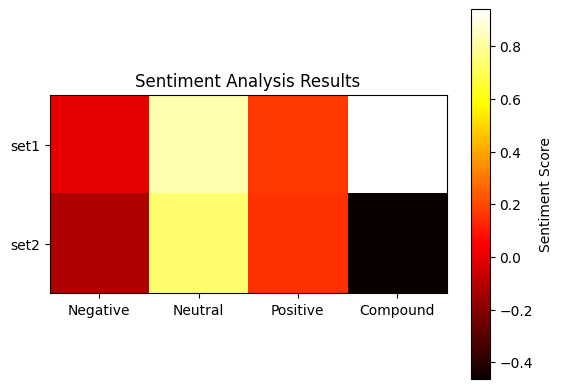

In [ ]:
#Create Heatmap for the results
sentiment_heatmap = np.array([[0.0, 0.829 , 0.171 , 0.9401 ],[-0.116 , 0.732, 0.151 , -0.4632]])
texts = ['set1', 'set2']
sentiments = ['Negative', 'Neutral', 'Positive', 'Compound']

plt.imshow(sentiment_heatmap, cmap='hot', interpolation='nearest')
plt.colorbar(label='Sentiment Score')
plt.xticks(np.arange(len(sentiments)), sentiments)
plt.yticks(np.arange(len(texts)), texts)
plt.title('Sentiment Analysis Results')
plt.show()